In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
from torch.autograd import Variable
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.serialization import load_lua
import numpy as np
import cv2
if torch.cuda.is_available():
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
FONT = cv2.FONT_HERSHEY_SIMPLEX
COLORS = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
# FONT = cv2.FONT_HERSHEY_SIMPLEX
from ssd import build_ssd
# from models import build_ssd as build_ssd_v1 # uncomment for older pool6 model

In [3]:
# import statistics as s
# images = []
# mean_x = []
# mean_y = []
# mean_z = []
# for f in os.listdir('/media/predible/sdd/Abhishek/ssd.pytorch/data/dataset/JPEGImages/'):
#     if f.endswith('jpg'):
#         image = cv2.imread(os.path.join('/media/predible/sdd/Abhishek/ssd.pytorch/data/dataset/JPEGImages/', f))
#         mean_value = cv2.mean(image)
# #         print(mean_value[0])
#         images.append(f)
#         mean_x.append(mean_value[0])
#         mean_y.append(mean_value[1])
#         mean_z.append(mean_value[2])
        
# print(s.mean(mean_x))
# print(s.mean(mean_y))
# print(s.mean(mean_z))

In [4]:
net = build_ssd('test', 300, 13)    # initialize SSD
# net.load_weights('/Users/abhishek/new/ssd300_0712_100000.pth')
net.load_weights('/Users/abhishek/Downloads/ssd_new_mean_0712_5000.pth')

Loading weights into state dict...
Finished!


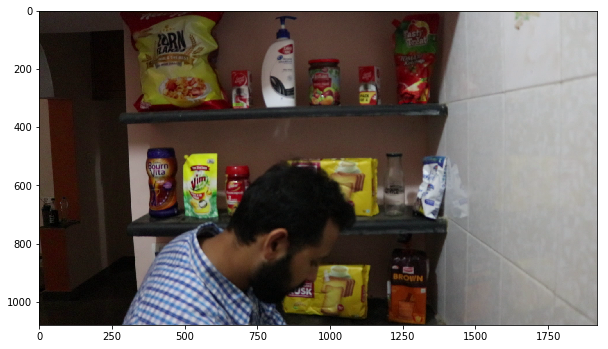

In [5]:
from matplotlib import pyplot as plt
videoFilePath = "/Users/abhishek/Documents/data/MVI_1481.MP4"
videoFile = cv2.VideoCapture(videoFilePath)
videoFile.set(1,100)
ret, image = videoFile.read()



rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# View the sampled input image before transform
plt.figure(figsize=(10,10))
plt.imshow(rgb_image)
plt.show()

In [6]:
x = cv2.resize(image, (300, 300)).astype(np.float32)
x -= (124, 128, 125)
print(cv2.mean(image))

x = x.astype(np.float32)
x = x[:, :, ::-1].copy()
x = torch.from_numpy(x).permute(2, 0, 1)


(75.17510175540123, 82.44988859953703, 92.49737268518518, 0.0)


In [7]:
xx = Variable(x.unsqueeze(0))     # wrap tensor in Variable
if torch.cuda.is_available():
    xx = xx.cuda()
y = net(xx)

/Users/abhishek/Downloads/ssd.pytorch/ssd.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self.softmax(conf.view(-1, self.num_classes)),  # conf preds


In [8]:
from data import VOC_CLASSES as labels
top_k=10

plt.figure(figsize=(10,10))
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
plt.imshow(rgb_image)  # plot the image for matplotlib
currentAxis = plt.gca()

detections = y.data
# scale each detection back up to the image
scale = torch.Tensor([rgb_image.shape[1::-1], rgb_image.shape[1::-1]])
for i in range(detections.size(1)):
    j = 0
    while detections[0,i,j,0] >= 0.2:
        score = detections[0,i,j,0]
#         print(score)
        label_name = labels[i-1]
        print(label_name)
        display_txt = '%s: %.2f'%(label_name, score)
        pt = (detections[0,i,j,1:]*scale).cpu().numpy()
        coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
        color = colors[i]
        currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
        currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
        j+=1

corn
dabur
ketchup
ketchup
bottle
bread
bread
rusk
rusk
milk
gn
gn
shampoo
jam
vim
bv


/Users/abhishek/anaconda3/lib/python3.6/site-packages/torch/tensor.py:309: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.mul(other)


## below iteratre through the entire video

In [ ]:
videoFilePath = "/Users/abhishek/Documents/data/MVI_1481.MP4"
videoFile = cv2.VideoCapture(videoFilePath)

xxx = 0
while True:
    xxx = xxx + 1
    ret, image = videoFile.read()
    %matplotlib inline
    from matplotlib import pyplot as plt

    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    x = cv2.resize(image, (300, 300)).astype(np.float32)
    x -= (124, 128, 125)
    x = x.astype(np.float32)
    x = x[:, :, ::-1].copy()
    # plt.imshow(x)
    x = torch.from_numpy(x).permute(2, 0, 1)


    xx = Variable(x.unsqueeze(0))   
    if torch.cuda.is_available():
        xx = xx.cuda()
    y = net(xx)

    from data import VOC_CLASSES as labels
    # print(labels)
    top_k=10

    plt.figure(figsize=(10,10))
    fig = plt.figure(figsize=(10,10))
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    # print(colors)
    # plt.imshow(rgb_image)  # plot the image for matplotlib
    currentAxis = plt.gca()
    # print(currentAxis)
    detections = y.data
    # scale each detection back up to the image
    scale = torch.Tensor([rgb_image.shape[1::-1], rgb_image.shape[1::-1]])
    for i in range(detections.size(1)):
        j = 0
        while detections[0,i,j,0] >= 0.2:
            score = detections[0,i,j,0]
    #         print(score)
            label_name = labels[i-1]
    #         print(label_name)
            display_txt = '%s: %.2f'%(label_name, score)
            pt = (detections[0,i,j,1:]*scale).cpu().numpy()
            coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
    #         print(pt[0])
            color = colors[i]

    #         cv2.rectangle(image, (int(pt[0]), int(pt[1])), (int(pt[2]), int(pt[3])), COLORS[i % 3], 2)
    #         cv2.putText(frame, label_name, (pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5}))

            cv2.rectangle(image, (int(pt[0]), int(pt[1])), (int(pt[2]), int(pt[3])), COLORS[i % 3], 2)
            cv2.putText(image, label_name, (int(pt[0]), int(pt[1])), FONT, 2, (255, 255, 255), 2, cv2.LINE_AA)

            currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
            currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
            j+=1
            plt.imshow(image)
    #         
    plt.imshow(rgb_image)
    xxx = str(xxx)
    print(xxx)
    fig.savefig(os.path.join('/Users/abhishek/img80k', xxx + '.png'))
    xxx = int(xxx)



/Users/abhishek/Downloads/ssd.pytorch/ssd.py:100: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  self.softmax(conf.view(-1, self.num_classes)),  # conf preds
/Users/abhishek/anaconda3/lib/python3.6/site-packages/torch/tensor.py:309: UserWarning: self and other not broadcastable, but have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.mul(other)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
